In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
from scipy.stats import linregress
from scipy.signal import medfilt
import seaborn as sns

In [2]:
df = pd.read_excel('/Users/liucheng/Desktop/Internship/Chitinase Assay/Chitinase_1A01__20_redo_20240501.xlsx',skiprows=7)

In [3]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,0,2,4,6,8,10,12,...,40,42,44,46,48,50,52,54,56,58
0,B,2,Sample X1,153246,152924,154101,153579,154455,155211,156055,...,154529.0,155615.0,154379.0,154497.0,154350.0,154387.0,153840.0,154933.0,154221.0,154093.0
1,B,3,Sample X2,85970,86581,86677,86286,86761,87046,87519,...,87077.0,87141.0,86903.0,87023.0,86652.0,87061.0,86599.0,86765.0,87264.0,86331.0
2,B,4,Sample X3,51464,51188,51002,51388,51185,51251,51536,...,51574.0,51203.0,51275.0,51259.0,51488.0,51074.0,51348.0,51541.0,51322.0,51432.0
3,B,5,Sample X4,33822,33656,33763,33594,33896,34104,33965,...,33693.0,33892.0,33812.0,33650.0,33708.0,33841.0,33559.0,33656.0,33727.0,33627.0
4,B,6,Sample X5,24912,24644,24609,24399,24482,24708,24751,...,24842.0,24633.0,24392.0,24622.0,24556.0,24556.0,24309.0,24639.0,24375.0,24537.0
5,B,7,Sample X6,19976,19877,19952,19925,19764,19813,19838,...,19793.0,19742.0,19659.0,19642.0,19797.0,19683.0,19665.0,19846.0,19553.0,19552.0
6,B,8,Sample X7,17509,17357,17354,17249,17185,17306,17406,...,17498.0,17252.0,17153.0,17110.0,17322.0,17167.0,17085.0,17216.0,17159.0,17111.0
7,B,9,Sample X8,16222,16172,16200,16334,16391,16253,16275,...,16147.0,16172.0,15976.0,15872.0,16114.0,16152.0,16086.0,15922.0,15918.0,15922.0
8,B,10,Sample X9,16086,16093,15783,15874,15902,15856,15817,...,15747.0,15863.0,15945.0,15596.0,15757.0,15715.0,15679.0,15824.0,15863.0,15638.0
9,B,11,Sample X10,15117,15200,15189,15110,15031,15090,14994,...,15139.0,15100.0,14969.0,14925.0,14827.0,15009.0,14827.0,14998.0,14992.0,14864.0


In [4]:
df_MBL = df.iloc[0:10,2:]
df_MBL

,Unnamed: 2,0,2,4,6,8,10,12,14,16,...,40,42,44,46,48,50,52,54,56,58
0,Sample X1,153246,152924,154101,153579,154455,155211,156055,155220,155232,...,154529.0,155615.0,154379.0,154497.0,154350.0,154387.0,153840.0,154933.0,154221.0,154093.0
1,Sample X2,85970,86581,86677,86286,86761,87046,87519,87113,87312,...,87077.0,87141.0,86903.0,87023.0,86652.0,87061.0,86599.0,86765.0,87264.0,86331.0
2,Sample X3,51464,51188,51002,51388,51185,51251,51536,51559,51709,...,51574.0,51203.0,51275.0,51259.0,51488.0,51074.0,51348.0,51541.0,51322.0,51432.0
3,Sample X4,33822,33656,33763,33594,33896,34104,33965,33767,34032,...,33693.0,33892.0,33812.0,33650.0,33708.0,33841.0,33559.0,33656.0,33727.0,33627.0
4,Sample X5,24912,24644,24609,24399,24482,24708,24751,24913,24936,...,24842.0,24633.0,24392.0,24622.0,24556.0,24556.0,24309.0,24639.0,24375.0,24537.0
5,Sample X6,19976,19877,19952,19925,19764,19813,19838,20118,19872,...,19793.0,19742.0,19659.0,19642.0,19797.0,19683.0,19665.0,19846.0,19553.0,19552.0
6,Sample X7,17509,17357,17354,17249,17185,17306,17406,17576,17418,...,17498.0,17252.0,17153.0,17110.0,17322.0,17167.0,17085.0,17216.0,17159.0,17111.0
7,Sample X8,16222,16172,16200,16334,16391,16253,16275,16313,16364,...,16147.0,16172.0,15976.0,15872.0,16114.0,16152.0,16086.0,15922.0,15918.0,15922.0
8,Sample X9,16086,16093,15783,15874,15902,15856,15817,15832,16015,...,15747.0,15863.0,15945.0,15596.0,15757.0,15715.0,15679.0,15824.0,15863.0,15638.0
9,Sample X10,15117,15200,15189,15110,15031,15090,14994,15143,15106,...,15139.0,15100.0,14969.0,14925.0,14827.0,15009.0,14827.0,14998.0,14992.0,14864.0


In [5]:
def transposed_df_add_time(df):
    df = df.T
    df.columns = df.iloc[0]
    df = df.drop(df.index[0])
    time_values = list(range(0,59,2))
    df.insert(0,'Time(min)', time_values)
    df.reset_index(drop=True, inplace = True)
    
    return df

In [6]:
MBL_transposed = transposed_df_add_time(df_MBL)
MBL_transposed

Unnamed: 2,Time(min),Sample X1,Sample X2,Sample X3,Sample X4,Sample X5,Sample X6,Sample X7,Sample X8,Sample X9,Sample X10
0,0,153246,85970,51464,33822,24912,19976,17509,16222,16086,15117
1,2,152924,86581,51188,33656,24644,19877,17357,16172,16093,15200
2,4,154101,86677,51002,33763,24609,19952,17354,16200,15783,15189
3,6,153579,86286,51388,33594,24399,19925,17249,16334,15874,15110
4,8,154455,86761,51185,33896,24482,19764,17185,16391,15902,15031
5,10,155211,87046,51251,34104,24708,19813,17306,16253,15856,15090
6,12,156055,87519,51536,33965,24751,19838,17406,16275,15817,14994
7,14,155220,87113,51559,33767,24913,20118,17576,16313,15832,15143
8,16,155232,87312,51709,34032,24936,19872,17418,16364,16015,15106
9,18,155339.0,87001.0,51506.0,33836.0,24622.0,19811.0,17433.0,16304.0,15790.0,15224.0


In [7]:
df_strain = df.iloc[10:28,2:]
df_strain

,Unnamed: 2,0,2,4,6,8,10,12,14,16,...,40,42,44,46,48,50,52,54,56,58
10,Sample X11,16956,16988,16952,17086,16886,17009,16997,17256,17323,...,17415.0,17443.0,17548.0,17397.0,17426.0,17561.0,17507.0,17540.0,17543.0,17616.0
11,Sample X12,15629,15418,15620,15592,15525,15529,15495,15642,15486,...,15534.0,15689.0,15756.0,15697.0,15772.0,15814.0,15674.0,15789.0,15778.0,15702.0
12,Sample X13,14962,14935,15059,14997,15101,14914,14902,15142,15062,...,15214.0,14972.0,15012.0,15240.0,15074.0,15193.0,14950.0,15048.0,15059.0,14995.0
13,Sample X14,14731,14747,14813,14806,14774,15025,14885,14840,15046,...,15148.0,15092.0,15293.0,15251.0,15217.0,15464.0,15368.0,15379.0,15377.0,15285.0
14,Sample X15,14974,15130,15114,15309,15100,15197,15291,15133,15211,...,15393.0,15527.0,15191.0,15302.0,15359.0,15264.0,15496.0,15442.0,15308.0,15307.0
15,Sample X16,14906,14756,14704,14774,14884,14764,14777,14616,14811,...,14589.0,14767.0,14784.0,14654.0,14935.0,14574.0,14713.0,14727.0,14652.0,14864.0
16,Sample X17,21107,21907,22775,23714,24954,25875,26875,28183,29320,...,43277.0,45029.0,46291.0,47254.0,48612.0,50038.0,50868.0,52352.0,53745.0,54671.0
17,Sample X18,17587,17882,17783,18127,18291,18566,18843,19146,19394,...,22591.0,22373.0,22913.0,23221.0,23342.0,23688.0,23944.0,24225.0,24559.0,24874.0
18,Sample X19,16400,16394,16714,16616,16804,16616,16641,17108,16711,...,17435.0,17317.0,17487.0,17726.0,17426.0,17839.0,17736.0,17833.0,17750.0,17873.0
19,Sample X20,19258,20371,21303,22461,23689,24648,26153,27413,28512,...,46466.0,48543.0,50028.0,51264.0,53091.0,54759.0,56252.0,57809.0,59538.0,61258.0


In [8]:
strain_transposed = transposed_df_add_time(df_strain)
strain_transposed

Unnamed: 2,Time(min),Sample X11,Sample X12,Sample X13,Sample X14,Sample X15,Sample X16,Sample X17,Sample X18,Sample X19,Sample X20,Sample X21,Sample X22,Sample X23,Sample X24,Sample X25,Sample X26,Sample X27,Sample X28
0,0,16956,15629,14962,14731,14974,14906,21107,17587,16400,19258,17003,16097,15232,14006,14098,14668,14308,13951
1,2,16988,15418,14935,14747,15130,14756,21907,17882,16394,20371,17258,16347,15304,14224,14256,14631,14158,13960
2,4,16952,15620,15059,14813,15114,14704,22775,17783,16714,21303,17650,16276,15467,14033,14255,14979,14246,13981
3,6,17086,15592,14997,14806,15309,14774,23714,18127,16616,22461,17906,16257,15474,14077,14295,14943,14228,13962
4,8,16886,15525,15101,14774,15100,14884,24954,18291,16804,23689,18232,16315,15714,13997,14382,15063,14317,13916
5,10,17009,15529,14914,15025,15197,14764,25875,18566,16616,24648,18489,16371,15629,13997,14234,14929,14088,13840
6,12,16997,15495,14902,14885,15291,14777,26875,18843,16641,26153,18978,16556,15472,14182,14160,14934,14305,14155
7,14,17256,15642,15142,14840,15133,14616,28183,19146,17108,27413,19251,16568,15492,14140,14273,15293,14399,14086
8,16,17323,15486,15062,15046,15211,14811,29320,19394,16711,28512,19621,16574,15803,14196,14151,15091,14376,14150
9,18,17291.0,15632.0,15061.0,15045.0,15321.0,14740.0,30422.0,19575.0,17076.0,30171.0,20008.0,16660.0,15836.0,14357.0,14282.0,15185.0,14294.0,13966.0


In [9]:
def data_process(df, last_col_idx):
    stad_data =[]
    last_col = df.columns[last_col_idx]
    for col in df.columns[1:last_col_idx]:
        data = df[col]-df[last_col]
        stad_data.append(data)
    stad_df = pd.concat(stad_data, axis =1)
    # assign col names to the new dataframes
    stad_df.columns =[f'con_{i}' for i in range(len(stad_df.columns))]
    time_col = df['Time(min)']
    stad_df.insert(0,'Time(min)',time_col)
    
    return stad_df

In [10]:
stad_MBL = data_process(MBL_transposed, 10)
stad_MBL

,Time(min),con_0,con_1,con_2,con_3,con_4,con_5,con_6,con_7,con_8
0,0,138129,70853,36347,18705,9795,4859,2392,1105,969
1,2,137724,71381,35988,18456,9444,4677,2157,972,893
2,4,138912,71488,35813,18574,9420,4763,2165,1011,594
3,6,138469,71176,36278,18484,9289,4815,2139,1224,764
4,8,139424,71730,36154,18865,9451,4733,2154,1360,871
5,10,140121,71956,36161,19014,9618,4723,2216,1163,766
6,12,141061,72525,36542,18971,9757,4844,2412,1281,823
7,14,140077,71970,36416,18624,9770,4975,2433,1170,689
8,16,140126,72206,36603,18926,9830,4766,2312,1258,909
9,18,140115.0,71777.0,36282.0,18612.0,9398.0,4587.0,2209.0,1080.0,566.0


In [11]:
def plot_std_df(std_df):
    for col in std_df.columns[1:]:
        plt.plot(std_df['Time(min)'], std_df[col], label = col)
    plt.xlabel('Time(min)')
    plt.ylabel('Fluorescence')
    plt.title('Standard Curve')
    plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left')
    plt.show()

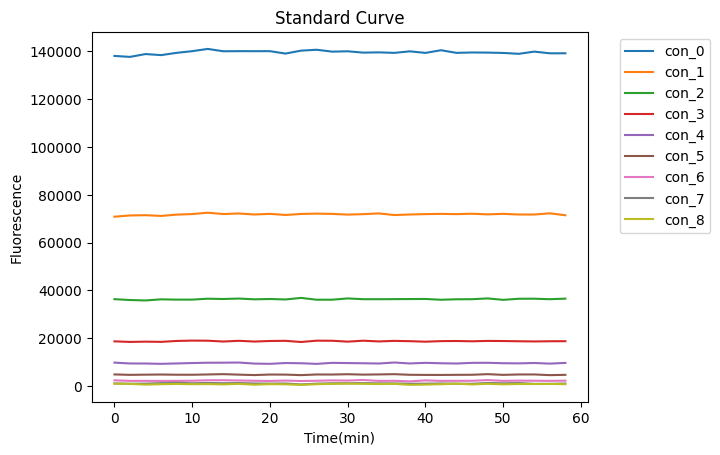

In [12]:
plot_std_df(stad_MBL)

In [13]:
strain_transposed

Unnamed: 2,Time(min),Sample X11,Sample X12,Sample X13,Sample X14,Sample X15,Sample X16,Sample X17,Sample X18,Sample X19,Sample X20,Sample X21,Sample X22,Sample X23,Sample X24,Sample X25,Sample X26,Sample X27,Sample X28
0,0,16956,15629,14962,14731,14974,14906,21107,17587,16400,19258,17003,16097,15232,14006,14098,14668,14308,13951
1,2,16988,15418,14935,14747,15130,14756,21907,17882,16394,20371,17258,16347,15304,14224,14256,14631,14158,13960
2,4,16952,15620,15059,14813,15114,14704,22775,17783,16714,21303,17650,16276,15467,14033,14255,14979,14246,13981
3,6,17086,15592,14997,14806,15309,14774,23714,18127,16616,22461,17906,16257,15474,14077,14295,14943,14228,13962
4,8,16886,15525,15101,14774,15100,14884,24954,18291,16804,23689,18232,16315,15714,13997,14382,15063,14317,13916
5,10,17009,15529,14914,15025,15197,14764,25875,18566,16616,24648,18489,16371,15629,13997,14234,14929,14088,13840
6,12,16997,15495,14902,14885,15291,14777,26875,18843,16641,26153,18978,16556,15472,14182,14160,14934,14305,14155
7,14,17256,15642,15142,14840,15133,14616,28183,19146,17108,27413,19251,16568,15492,14140,14273,15293,14399,14086
8,16,17323,15486,15062,15046,15211,14811,29320,19394,16711,28512,19621,16574,15803,14196,14151,15091,14376,14150
9,18,17291.0,15632.0,15061.0,15045.0,15321.0,14740.0,30422.0,19575.0,17076.0,30171.0,20008.0,16660.0,15836.0,14357.0,14282.0,15185.0,14294.0,13966.0


In [14]:
df_sub1 = df.iloc[10:16,2:]
df_sub1

,Unnamed: 2,0,2,4,6,8,10,12,14,16,...,40,42,44,46,48,50,52,54,56,58
10,Sample X11,16956,16988,16952,17086,16886,17009,16997,17256,17323,...,17415.0,17443.0,17548.0,17397.0,17426.0,17561.0,17507.0,17540.0,17543.0,17616.0
11,Sample X12,15629,15418,15620,15592,15525,15529,15495,15642,15486,...,15534.0,15689.0,15756.0,15697.0,15772.0,15814.0,15674.0,15789.0,15778.0,15702.0
12,Sample X13,14962,14935,15059,14997,15101,14914,14902,15142,15062,...,15214.0,14972.0,15012.0,15240.0,15074.0,15193.0,14950.0,15048.0,15059.0,14995.0
13,Sample X14,14731,14747,14813,14806,14774,15025,14885,14840,15046,...,15148.0,15092.0,15293.0,15251.0,15217.0,15464.0,15368.0,15379.0,15377.0,15285.0
14,Sample X15,14974,15130,15114,15309,15100,15197,15291,15133,15211,...,15393.0,15527.0,15191.0,15302.0,15359.0,15264.0,15496.0,15442.0,15308.0,15307.0
15,Sample X16,14906,14756,14704,14774,14884,14764,14777,14616,14811,...,14589.0,14767.0,14784.0,14654.0,14935.0,14574.0,14713.0,14727.0,14652.0,14864.0


In [15]:
df_sub2 = df.iloc[16:22,2:]
df_sub2

,Unnamed: 2,0,2,4,6,8,10,12,14,16,...,40,42,44,46,48,50,52,54,56,58
16,Sample X17,21107,21907,22775,23714,24954,25875,26875,28183,29320,...,43277.0,45029.0,46291.0,47254.0,48612.0,50038.0,50868.0,52352.0,53745.0,54671.0
17,Sample X18,17587,17882,17783,18127,18291,18566,18843,19146,19394,...,22591.0,22373.0,22913.0,23221.0,23342.0,23688.0,23944.0,24225.0,24559.0,24874.0
18,Sample X19,16400,16394,16714,16616,16804,16616,16641,17108,16711,...,17435.0,17317.0,17487.0,17726.0,17426.0,17839.0,17736.0,17833.0,17750.0,17873.0
19,Sample X20,19258,20371,21303,22461,23689,24648,26153,27413,28512,...,46466.0,48543.0,50028.0,51264.0,53091.0,54759.0,56252.0,57809.0,59538.0,61258.0
20,Sample X21,17003,17258,17650,17906,18232,18489,18978,19251,19621,...,24234.0,24606.0,25115.0,25637.0,25775.0,26367.0,26848.0,27074.0,27422.0,28064.0
21,Sample X22,16097,16347,16276,16257,16315,16371,16556,16568,16574,...,17301.0,17314.0,17483.0,17380.0,17599.0,17816.0,17587.0,17746.0,17932.0,17736.0


In [16]:
df_sub3 = df.iloc[22:28,2:]
df_sub3

,Unnamed: 2,0,2,4,6,8,10,12,14,16,...,40,42,44,46,48,50,52,54,56,58
22,Sample X23,15232,15304,15467,15474,15714,15629,15472,15492,15803,...,16632.0,16775.0,16757.0,16756.0,16975.0,16957.0,17284.0,17011.0,17122.0,17168.0
23,Sample X24,14006,14224,14033,14077,13997,13997,14182,14140,14196,...,14705.0,14653.0,14602.0,14493.0,14789.0,14658.0,14659.0,14573.0,14702.0,14533.0
24,Sample X25,14098,14256,14255,14295,14382,14234,14160,14273,14151,...,14218.0,14453.0,14321.0,14167.0,14278.0,14355.0,14486.0,14139.0,14447.0,14225.0
25,Sample X26,14668,14631,14979,14943,15063,14929,14934,15293,15091,...,15908.0,16156.0,16348.0,16131.0,16291.0,16377.0,16506.0,16449.0,16517.0,16668.0
26,Sample X27,14308,14158,14246,14228,14317,14088,14305,14399,14376,...,14665.0,14748.0,14766.0,14809.0,14956.0,14892.0,14979.0,14814.0,14900.0,15126.0
27,Sample X28,13951,13960,13981,13962,13916,13840,14155,14086,14150,...,14117.0,14149.0,13864.0,13942.0,13940.0,14187.0,14258.0,13969.0,14114.0,13945.0


In [17]:
df_sub1_T =transposed_df_add_time(df_sub1)
df_sub1_T

Unnamed: 2,Time(min),Sample X11,Sample X12,Sample X13,Sample X14,Sample X15,Sample X16
0,0,16956,15629,14962,14731,14974,14906
1,2,16988,15418,14935,14747,15130,14756
2,4,16952,15620,15059,14813,15114,14704
3,6,17086,15592,14997,14806,15309,14774
4,8,16886,15525,15101,14774,15100,14884
5,10,17009,15529,14914,15025,15197,14764
6,12,16997,15495,14902,14885,15291,14777
7,14,17256,15642,15142,14840,15133,14616
8,16,17323,15486,15062,15046,15211,14811
9,18,17291.0,15632.0,15061.0,15045.0,15321.0,14740.0


In [18]:
df_sub2_T =transposed_df_add_time(df_sub2)
df_sub2_T

Unnamed: 2,Time(min),Sample X17,Sample X18,Sample X19,Sample X20,Sample X21,Sample X22
0,0,21107,17587,16400,19258,17003,16097
1,2,21907,17882,16394,20371,17258,16347
2,4,22775,17783,16714,21303,17650,16276
3,6,23714,18127,16616,22461,17906,16257
4,8,24954,18291,16804,23689,18232,16315
5,10,25875,18566,16616,24648,18489,16371
6,12,26875,18843,16641,26153,18978,16556
7,14,28183,19146,17108,27413,19251,16568
8,16,29320,19394,16711,28512,19621,16574
9,18,30422.0,19575.0,17076.0,30171.0,20008.0,16660.0


In [19]:
df_sub3_T =transposed_df_add_time(df_sub3)
df_sub3_T

Unnamed: 2,Time(min),Sample X23,Sample X24,Sample X25,Sample X26,Sample X27,Sample X28
0,0,15232,14006,14098,14668,14308,13951
1,2,15304,14224,14256,14631,14158,13960
2,4,15467,14033,14255,14979,14246,13981
3,6,15474,14077,14295,14943,14228,13962
4,8,15714,13997,14382,15063,14317,13916
5,10,15629,13997,14234,14929,14088,13840
6,12,15472,14182,14160,14934,14305,14155
7,14,15492,14140,14273,15293,14399,14086
8,16,15803,14196,14151,15091,14376,14150
9,18,15836.0,14357.0,14282.0,15185.0,14294.0,13966.0


In [20]:
def plot_strains_df(df):
    for col in df.columns[1:]:
        plt.plot(df['Time(min)'], df[col], label =col)
    plt.xlabel('Time(min)')
    plt.ylabel('Fluorescence')
    plt.title ('Fluorescence Signal Plot')
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.show()

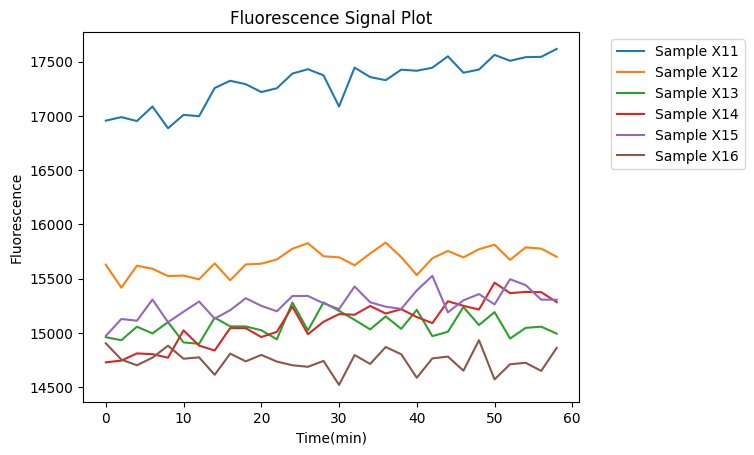

In [21]:
plot_strains_df(df_sub1_T)

In [22]:
column_mapping_sub1_rep1 ={
    'Sample X11' : 'rep1_10-3',
    'Sample X12' : 'rep1_10-4',
    'Sample X13' : 'rep1_10-5'
    }

column_mapping_sub1_rep2 ={
    'Sample X14' : 'rep2_10-3',
    'Sample X15' : 'rep2_10-4',
    'Sample X16' : 'rep2_10-5'
    }
column_mapping_sub2_rep1 ={
    'Sample X17' : 'rep1_10-3',
    'Sample X18' : 'rep1_10-4',
    'Sample X19' : 'rep1_10-5'
    }

column_mapping_sub2_rep2 ={
    'Sample X20' : 'rep2_10-3',
    'Sample X21' : 'rep2_10-4',
    'Sample X22' : 'rep2_10-5'
    }
column_mapping_sub3_rep1 ={
    'Sample X23' : 'rep1_10-3',
    'Sample X24' : 'rep1_10-4',
    'Sample X25' : 'rep1_10-5'
    }

column_mapping_sub3_rep2 ={
    'Sample X26' : 'rep2_10-3',
    'Sample X27' : 'rep2_10-4',
    'Sample X28' : 'rep2_10-5'
    }

def rename_method(df):
    
    rename_list = [column_mapping_sub1_rep1,column_mapping_sub1_rep2,column_mapping_sub2_rep1,column_mapping_sub2_rep2,column_mapping_sub3_rep1,column_mapping_sub3_rep2]
    for mapping in rename_list:
        df.rename(columns = mapping, inplace= True)
    return df


# selected_col_rep1 =df_sub1_T[['Sample X11','Sample X12','Sample X13']]
# selected_col_rep2 =df_sub1_T[['Sample X14','Sample X15','Sample X16']]
# # rename the cols
# selected_col_rep1.rename(columns = column_mapping_rep1, inplace= True) 
# selected_col_rep2.rename(columns = column_mapping_rep2, inplace= True)
# cls =[light_blue, medium_blue, dark_blue]
# fig, ax = plt.subplots()
# i=0

# for col in selected_col_rep1:
#     x = df_sub1_T['Time(min)']
#     y = selected_col_rep1[col]
#     plt.plot(x,y, marker='o', linestyle='-',color = cls[i],markersize=4)
#     i+=1
# i=0
    
# for col in selected_col_rep2:
#     x = df_sub1_T['Time(min)']
#     y = selected_col_rep2[col]
#     plt.plot(x,y, marker='x', linestyle='-',color = cls[i],markersize=4)
#     i+=1

# plt.legend (['rep1_10-3', 'rep1_10-4', 'rep1_10-5', 'rep2_10-3', 'rep2_10-3', 'rep2_10-3'], title ='dilution factor',loc='upper right',bbox_to_anchor=(1.3,1))
# plt.xlabel ('Time(min)')
# plt.ylabel('Fluorescence Signal')
# plt.title('Chitinase Assay Plot for Substrate 1 in MBL+Glu PR:26°C')
# plt.show()

In [23]:
rename_method(df_sub1_T)
rename_method(df_sub2_T)
rename_method(df_sub3_T)


Unnamed: 2,Time(min),rep1_10-3,rep1_10-4,rep1_10-5,rep2_10-3,rep2_10-4,rep2_10-5
0,0,15232,14006,14098,14668,14308,13951
1,2,15304,14224,14256,14631,14158,13960
2,4,15467,14033,14255,14979,14246,13981
3,6,15474,14077,14295,14943,14228,13962
4,8,15714,13997,14382,15063,14317,13916
5,10,15629,13997,14234,14929,14088,13840
6,12,15472,14182,14160,14934,14305,14155
7,14,15492,14140,14273,15293,14399,14086
8,16,15803,14196,14151,15091,14376,14150
9,18,15836.0,14357.0,14282.0,15185.0,14294.0,13966.0


In [24]:
def plotting_method(df):
    light_blue = '#ADD8E6'
    medium_blue = '#4682B4'
    dark_blue = '#00008B'
    cls =[light_blue, medium_blue, dark_blue,light_blue, medium_blue, dark_blue]
    fig, ax = plt.subplots()  # Create a new figure and axes
    df_1 = df.iloc[:,1:4]
    i=0
    for col in df_1:
        x = df['Time(min)']
        y =df_1[col]
        plt.plot(x,y, marker='o', linestyle='-',color = cls[i],markersize=4,label=col)
        i+=1
    df_2 = df.iloc[:,4:7]
    j=3
    for col in df_2:
        x = df['Time(min)']
        y =df_2[col]
        plt.plot(x,y, marker='x', linestyle='-',color = cls[j],markersize=4,label=col)
        j+=1
    plt.legend (title ='dilution factor',loc='upper right',bbox_to_anchor=(1.3,1))
    plt.xlabel ('Time(min)')
    plt.ylabel('Fluorescence Signal')
    plt.title('Chitinase Assay Plot for Substrate 1 in MBL+Glu PR:26°C')
    plt.show()

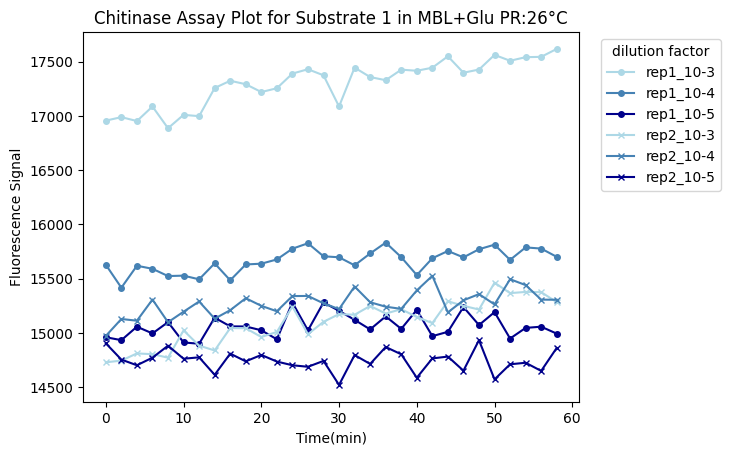

In [25]:
plotting_method(df_sub1_T)

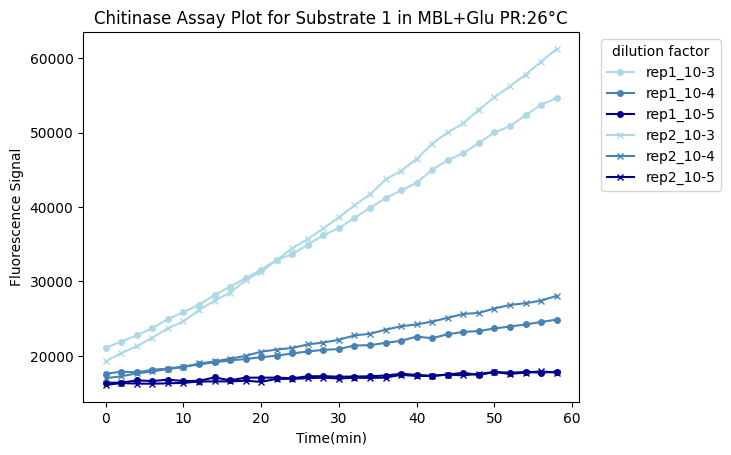

In [26]:
plotting_method(df_sub2_T)

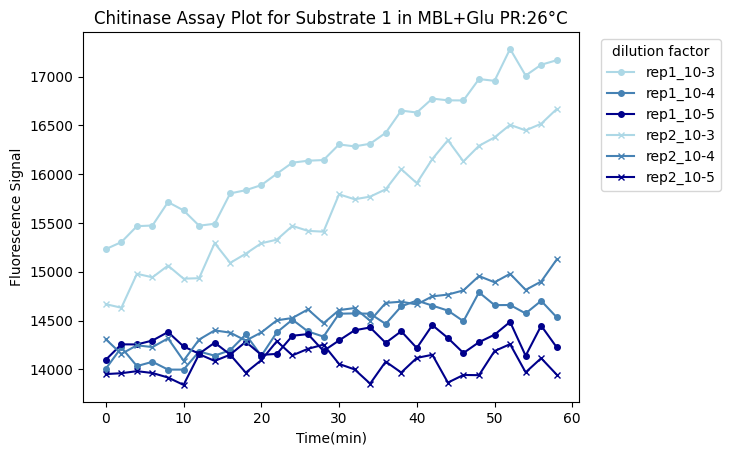

In [27]:
plotting_method(df_sub3_T)

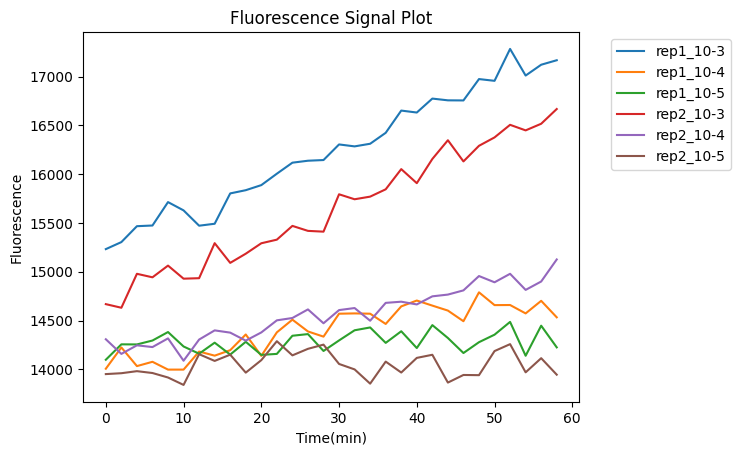

In [28]:
plot_strains_df(df_sub3_T)

In [29]:
stad_MBL

,Time(min),con_0,con_1,con_2,con_3,con_4,con_5,con_6,con_7,con_8
0,0,138129,70853,36347,18705,9795,4859,2392,1105,969
1,2,137724,71381,35988,18456,9444,4677,2157,972,893
2,4,138912,71488,35813,18574,9420,4763,2165,1011,594
3,6,138469,71176,36278,18484,9289,4815,2139,1224,764
4,8,139424,71730,36154,18865,9451,4733,2154,1360,871
5,10,140121,71956,36161,19014,9618,4723,2216,1163,766
6,12,141061,72525,36542,18971,9757,4844,2412,1281,823
7,14,140077,71970,36416,18624,9770,4975,2433,1170,689
8,16,140126,72206,36603,18926,9830,4766,2312,1258,909
9,18,140115.0,71777.0,36282.0,18612.0,9398.0,4587.0,2209.0,1080.0,566.0


138129
70853
36347
18705
9795
4859
2392
1105
969


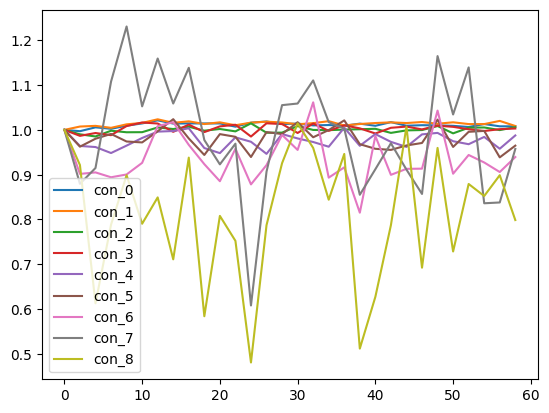

In [30]:
for col in stad_MBL.columns[1:]:
    print(stad_MBL[col][0])
    plt.plot(stad_MBL['Time(min)'], stad_MBL[col]/stad_MBL[col][0], label = col)
plt.legend()

In [31]:
def get_slope(start_y, end_y, df):
    for col in df.columns[1:]:
        y_range = df[(df[col]>= start_y)&(df[col]<= end_y)][col]
        x_range = df['Time(min)'].iloc[y_range.index]
        #print(y_range)
        x_range = np.array(x_range)
        y_range = np.array(y_range)
        y_range = pd.to_numeric(y_range)
        
        if len(x_range) != len(y_range):
            print(f"Length mismatch for column {col}")
            continue  # Skip current column if lengths are not equal
    
        slope, intercept, r_value, p_value, std_err = linregress(x_range, y_range)
        print(slope*60)

In [32]:
get_slope(0,20000,df_sub1_T)

645.250278086763
241.10789766407117
85.44827586206895
648.4738598442713
263.01223581757495
-58.49165739710789


In [33]:
get_slope(0,60000,df_sub2_T)

35480.14238042269
7563.583982202447
1428.5539488320353
43884.70935960591
11487.04338153504
1784.2958843159063


In [34]:
get_slope(0,17000,df_sub3_T)

2071.0461538461536
749.1657397107897
122.0155728587319
2044.751946607341
873.7107897664072
52.67853170189099


In [35]:
def stad_curve(df):
    x_con = [2500, 1250, 625, 312.5, 156.3, 78.1, 39.1, 19.5,9.8]
    x_con = np.array(x_con, dtype= float)
    y_flo = df.iloc[0,1:]
    y_flo = pd.to_numeric(y_flo)
    x_value = x_con[:len(y_flo)]
    slope, intercept, r_value, p_value, std_err = linregress(x_value,y_flo)
    print('The slope of the standard curve is',slope)
    # plot the original data
    plt.scatter(x_value,y_flo, label ='Original Data of Standard Curve')
    # plot the regression line
    plt.plot(x_value, intercept +slope*x_value, 'r', label ='Fitted Line' )
    #annotate the plot
    text = f'R-squared:{r_value:.4f}\n P-value:{p_value:.4f}\n Std_Err:{std_err:.4f}'
    plt.annotate(text, xy=(0.7,0.1),xycoords='axes fraction',fontsize=10,color='black')
    plt.xlabel('MU Concentration')
    plt.legend()
    plt.show()

In [36]:
stad_MBL

,Time(min),con_0,con_1,con_2,con_3,con_4,con_5,con_6,con_7,con_8
0,0,138129,70853,36347,18705,9795,4859,2392,1105,969
1,2,137724,71381,35988,18456,9444,4677,2157,972,893
2,4,138912,71488,35813,18574,9420,4763,2165,1011,594
3,6,138469,71176,36278,18484,9289,4815,2139,1224,764
4,8,139424,71730,36154,18865,9451,4733,2154,1360,871
5,10,140121,71956,36161,19014,9618,4723,2216,1163,766
6,12,141061,72525,36542,18971,9757,4844,2412,1281,823
7,14,140077,71970,36416,18624,9770,4975,2433,1170,689
8,16,140126,72206,36603,18926,9830,4766,2312,1258,909
9,18,140115.0,71777.0,36282.0,18612.0,9398.0,4587.0,2209.0,1080.0,566.0


The slope of the standard curve is 55.24011769182594


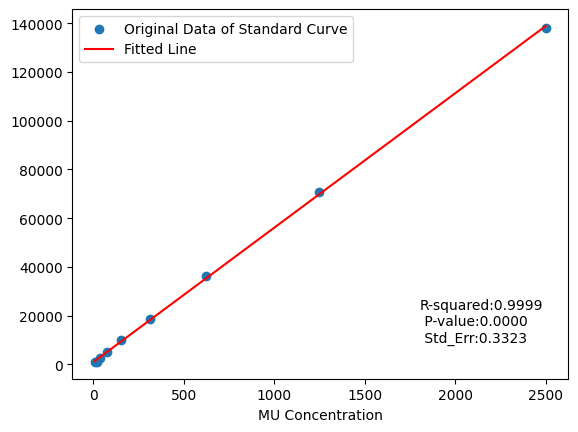

In [37]:
stad_curve(stad_MBL)

In [38]:
def calculator(num,od):
    std = 55.24011769182594
    result = num/std/od
    return result

In [39]:
get_slope(0,20000,df_sub1_T)

645.250278086763
241.10789766407117
85.44827586206895
648.4738598442713
263.01223581757495
-58.49165739710789


In [40]:
calculator(-58.49165739710789,0.362)

-2.92503294402499

In [41]:
get_slope(0,60000,df_sub2_T)

35480.14238042269
7563.583982202447
1428.5539488320353
43884.70935960591
11487.04338153504
1784.2958843159063


In [42]:
calculator(1784.2958843159063,0.362)

89.22852378893758

In [43]:
get_slope(0,17000,df_sub3_T)

2071.0461538461536
749.1657397107897
122.0155728587319
2044.751946607341
873.7107897664072
52.67853170189099


In [44]:
calculator(52.67853170189099,0.362)

2.634331929163538

In [45]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,0,2,4,6,8,10,12,...,40,42,44,46,48,50,52,54,56,58
0,B,2,Sample X1,153246,152924,154101,153579,154455,155211,156055,...,154529.0,155615.0,154379.0,154497.0,154350.0,154387.0,153840.0,154933.0,154221.0,154093.0
1,B,3,Sample X2,85970,86581,86677,86286,86761,87046,87519,...,87077.0,87141.0,86903.0,87023.0,86652.0,87061.0,86599.0,86765.0,87264.0,86331.0
2,B,4,Sample X3,51464,51188,51002,51388,51185,51251,51536,...,51574.0,51203.0,51275.0,51259.0,51488.0,51074.0,51348.0,51541.0,51322.0,51432.0
3,B,5,Sample X4,33822,33656,33763,33594,33896,34104,33965,...,33693.0,33892.0,33812.0,33650.0,33708.0,33841.0,33559.0,33656.0,33727.0,33627.0
4,B,6,Sample X5,24912,24644,24609,24399,24482,24708,24751,...,24842.0,24633.0,24392.0,24622.0,24556.0,24556.0,24309.0,24639.0,24375.0,24537.0
5,B,7,Sample X6,19976,19877,19952,19925,19764,19813,19838,...,19793.0,19742.0,19659.0,19642.0,19797.0,19683.0,19665.0,19846.0,19553.0,19552.0
6,B,8,Sample X7,17509,17357,17354,17249,17185,17306,17406,...,17498.0,17252.0,17153.0,17110.0,17322.0,17167.0,17085.0,17216.0,17159.0,17111.0
7,B,9,Sample X8,16222,16172,16200,16334,16391,16253,16275,...,16147.0,16172.0,15976.0,15872.0,16114.0,16152.0,16086.0,15922.0,15918.0,15922.0
8,B,10,Sample X9,16086,16093,15783,15874,15902,15856,15817,...,15747.0,15863.0,15945.0,15596.0,15757.0,15715.0,15679.0,15824.0,15863.0,15638.0
9,B,11,Sample X10,15117,15200,15189,15110,15031,15090,14994,...,15139.0,15100.0,14969.0,14925.0,14827.0,15009.0,14827.0,14998.0,14992.0,14864.0


In [46]:
df_result = df.iloc[46:53,:4]
# set the first row as the header
df_result.reset_index()
df_result=df_result.iloc [:,1:]


In [47]:
df_result.iloc[0,:]

Unnamed: 1    20˚Csub1
Unnamed: 2    20˚Csub2
0             20˚Csub3
Name: 46, dtype: object

In [48]:
df_result.columns = df_result.iloc[0,:]
df_result=df_result[1:].reset_index(drop = True)
df_result

46,20˚Csub1,20˚Csub2,20˚Csub3
0,17.671448,971.693504,56.719674
1,8.591977,269.531374,26.696824
2,5.333972,89.175192,7.616627
3,15.673142,1060.661521,49.420168
4,8.672594,378.775013,28.81
5,-2.925033,89.228524,2.634332


In [49]:
df_result
print(df.dtypes)

Unnamed: 0     object
Unnamed: 1     object
Unnamed: 2     object
0              object
2              object
4              object
6              object
8              object
10             object
12             object
14             object
16             object
18            float64
20            float64
22            float64
24            float64
26            float64
28            float64
30            float64
32            float64
34            float64
36            float64
38            float64
40            float64
42            float64
44            float64
46            float64
48            float64
50            float64
52            float64
54            float64
56            float64
58            float64
dtype: object


In [50]:
data = {
    'substrate1': [17.671448, 8.591977, 5.333972, 15.673142, 8.672594, -2.925033],
    'substrate2': [971.693504, 269.531374, 89.175192, 1060.661521, 378.775013, 89.228524],
    'substrate3': [56.719674, 26.696824, 7.616627, 49.420168, 28.81, 2.634332],
    'OD':[0.661, 0.508, 0.29, 0.749, 0.549, 0.362]
}
df= pd.DataFrame(data)
# create the replicate labels
replicates = ['rep1']*3 +['rep2']*3
# add the replicate col
df["Replicate"]= replicates
# add dilution labels
dilutions = ['10-3', '10-4', '10-5', '10-3', '10-4', '10-5']
df['Dilution'] = dilutions
# melt the df
df_long = df.melt(id_vars=['Replicate', 'Dilution','OD'], var_name='Substrate', value_name='Concentration')
df_long['Substrate'] = df_long['Substrate'].str.extract(r'(\d+)').astype(int)
print(df_long)

   Replicate Dilution     OD  Substrate  Concentration
0       rep1     10-3  0.661          1      17.671448
1       rep1     10-4  0.508          1       8.591977
2       rep1     10-5  0.290          1       5.333972
3       rep2     10-3  0.749          1      15.673142
4       rep2     10-4  0.549          1       8.672594
5       rep2     10-5  0.362          1      -2.925033
6       rep1     10-3  0.661          2     971.693504
7       rep1     10-4  0.508          2     269.531374
8       rep1     10-5  0.290          2      89.175192
9       rep2     10-3  0.749          2    1060.661521
10      rep2     10-4  0.549          2     378.775013
11      rep2     10-5  0.362          2      89.228524
12      rep1     10-3  0.661          3      56.719674
13      rep1     10-4  0.508          3      26.696824
14      rep1     10-5  0.290          3       7.616627
15      rep2     10-3  0.749          3      49.420168
16      rep2     10-4  0.549          3      28.810000
17      re

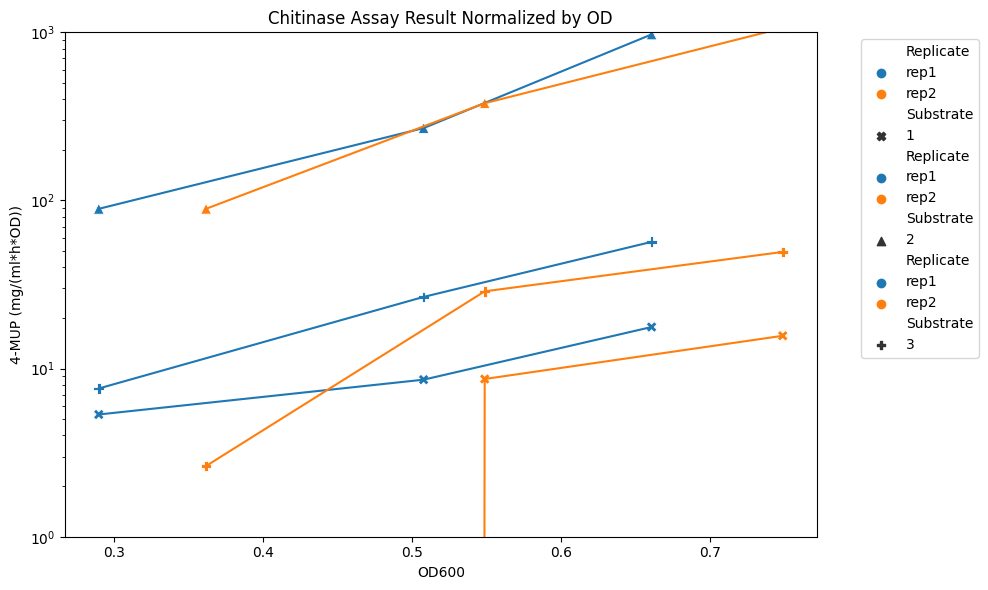

In [51]:
from matplotlib.backends.backend_pdf import PdfPages
file_path_chitinase_OD ='/Users/liucheng/Desktop/My_thesis_2024/Plots/chitinase_normalized.pdf' 
with PdfPages(file_path_chitinase_OD) as pdf:

    # define the markers for each substrate
    markers = {1: 'X', 2: '^', 3: 'P'}
    # create a seaborn scatterplot
    plt.figure (figsize=(10,6))

    # loop through each substrate to plot lines and points separately
    for substrate in df_long['Substrate'].unique():
        subset = df_long[df_long['Substrate']== substrate]
        sns.lineplot(data=subset,  x='OD', y='Concentration', hue= 'Replicate', legend=False)
        sns.scatterplot(data =subset, x='OD', y='Concentration', hue= 'Replicate', style='Substrate', markers = markers, s=60)
    # customize the legend
    plt.legend(title =f'', bbox_to_anchor=(1.05, 1), loc='upper left')
    # Add titles and labels
    plt.title('Chitinase Assay Result Normalized by OD')
    plt.xlabel('OD600')
    plt.ylabel('4-MUP (mg/(ml*h*OD))')
    plt.yscale('log')
    
    # set the y-axis limits
    plt.ylim(1,1000)

    # Show the plot
    plt.tight_layout()

    pdf.savefig(plt.gcf())
    plt.show()

In [52]:
data_without_normalization = {
    'substrate1': [11.68082736,4.364724547,1.546851807,11.73918317,4.761254081,-1.058861926],
    'substrate2': [642.289406, 136.9219382, 25.86080567, 794.435479, 207.947482, 32.30072561],
    'substrate3': [37.49170422, 13.56198667, 2.20882174, 37.01570583, 15.81659899, 0.953628158],
    'OD':[0.661, 0.508, 0.29, 0.749, 0.549, 0.362]
}
df_new= pd.DataFrame(data_without_normalization)
# create the replicate labels
replicates = ['rep1']*3 +['rep2']*3
# add the replicate col
df_new["Replicate"]= replicates
# add dilution labels
dilutions = ['10-3', '10-4', '10-5', '10-3', '10-4', '10-5']
df_new['Dilution'] = dilutions
# melt the df
df_out = df_new.melt(id_vars=['Replicate', 'Dilution','OD'], var_name='Substrate', value_name='Concentration')
df_out['Substrate'] = df_out['Substrate'].str.extract(r'(\d+)').astype(int)
print(df_out)

   Replicate Dilution     OD  Substrate  Concentration
0       rep1     10-3  0.661          1      11.680827
1       rep1     10-4  0.508          1       4.364725
2       rep1     10-5  0.290          1       1.546852
3       rep2     10-3  0.749          1      11.739183
4       rep2     10-4  0.549          1       4.761254
5       rep2     10-5  0.362          1      -1.058862
6       rep1     10-3  0.661          2     642.289406
7       rep1     10-4  0.508          2     136.921938
8       rep1     10-5  0.290          2      25.860806
9       rep2     10-3  0.749          2     794.435479
10      rep2     10-4  0.549          2     207.947482
11      rep2     10-5  0.362          2      32.300726
12      rep1     10-3  0.661          3      37.491704
13      rep1     10-4  0.508          3      13.561987
14      rep1     10-5  0.290          3       2.208822
15      rep2     10-3  0.749          3      37.015706
16      rep2     10-4  0.549          3      15.816599
17      re

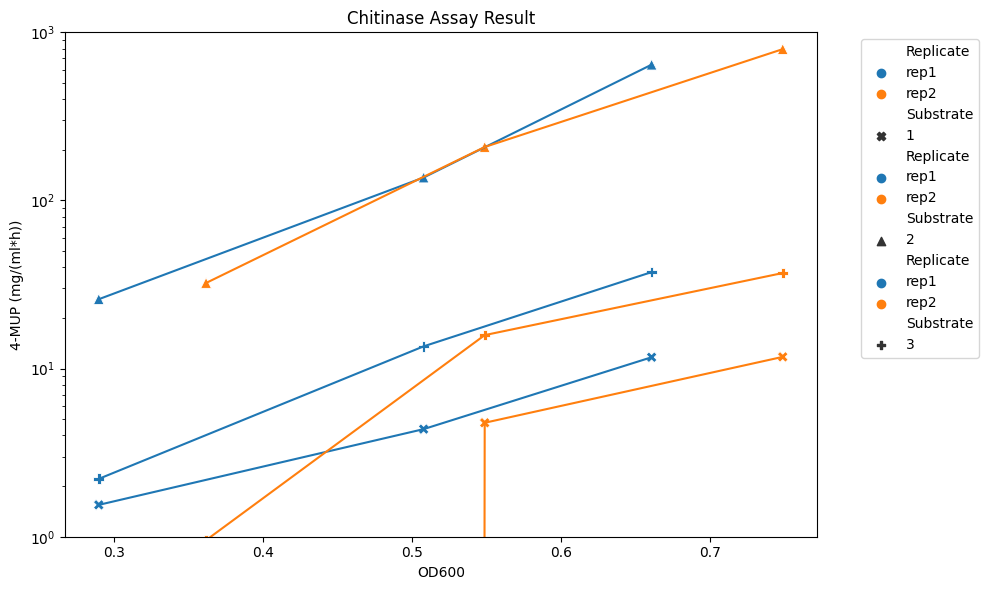

In [53]:
file_path_chitinase_noOD ='/Users/liucheng/Desktop/My_thesis_2024/Plots/chitinase_no_normalization.pdf' 
with PdfPages(file_path_chitinase_noOD) as pdf:

    # define the markers for each substrate
    markers = {1: 'X', 2: '^', 3: 'P'}
    # create a seaborn scatterplot
    plt.figure (figsize=(10,6))

    # loop through each substrate to plot lines and points separately
    for substrate in df_out['Substrate'].unique():
        subset =df_out[df_out['Substrate']== substrate]
        sns.lineplot(data=subset,  x='OD', y='Concentration', hue= 'Replicate', legend=False)
        sns.scatterplot(data =subset, x='OD', y='Concentration', hue= 'Replicate', style='Substrate', markers = markers, s=60)
    # customize the legend
    plt.legend(title =f'', bbox_to_anchor=(1.05, 1), loc='upper left')
    # Add titles and labels
    plt.title('Chitinase Assay Result')
    plt.xlabel('OD600')
    plt.ylabel('4-MUP (mg/(ml*h))')
    # Set the y-axis to a logarithmic scale
    
    plt.yscale('log')
    
    # set the y-axis limits
    plt.ylim(1,1000)

    # Show the plot
    plt.tight_layout()

    pdf.savefig(plt.gcf())
    plt.show()

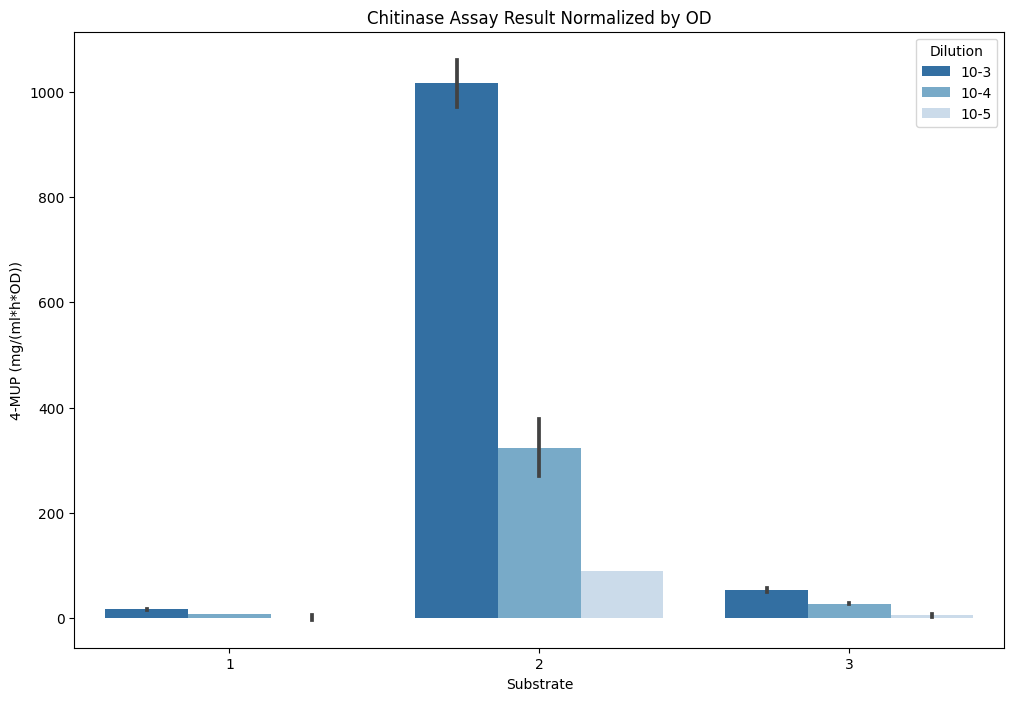

In [54]:
# plot the data
import matplotlib.pyplot as plt
import seaborn as sns
def paired_bar_chart(df):
    plt.figure(figsize=(12,8))
    custom_palette = sns.color_palette('Blues',n_colors = len(df['Dilution'].unique()))[::-1]
    sns.barplot(x='Substrate', y='Concentration', hue ='Dilution', data = df, dodge = True, palette = custom_palette)
    plt.xlabel('Substrate')
    plt.ylabel('4-MUP (mg/(ml*h*OD))')
    plt.title('Chitinase Assay Result Normalized by OD')
    plt.legend(title='Dilution')
    plt.show()
paired_bar_chart(df_long)

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# data from chitinase_24_20_14
data_old = {
    '20_substrate1': [49.84,153.60,18.72,41.48,29.92,20.67],
    '20_substrate2': [1115.82,517.51,115.86,786.35,219.50,111.85],
    '20_substrate3': [56.01,38.35,8.71,46.00,np.nan,np.nan],
    '14_substrate1': [np.nan,np.nan,34.77,np.nan,9.52,0.08],
    '14_substrate2': [664.00,74.19,31.00,632.66,83.23,22.38],
    '14_substrate3':[33.10,np.nan,8.64,18.76,np.nan,np.nan]
    
}
df_old= pd.DataFrame(data_old)
# create the replicate labels
replicates = ['rep1']*3 +['rep2']*3
# add the replicate col

df_old["Replicate"]= replicates

# add dilution labels
dilutions = ['10-3', '10-4', '10-5', '10-3', '10-4', '10-5']
df_old['Dilution'] = dilutions
# melt the df
df_long_old = df_old.melt(id_vars=['Replicate', 'Dilution'], var_name='Temperature_Substrate', value_name='Concentration')
# extract the temperature and substrate information
df_long_old['Temperature']=df_long_old['Temperature_Substrate'].str.extract(r'(\d+)')[0]
df_long_old['Substrate'] = df_long_old['Temperature_Substrate'].str.extract(r'substrate(\d)')[0]
# drop the original subs_tem col
df_long_old = df_long_old.drop(columns=['Temperature_Substrate'])
# convert temp to an integer
df_long_old['Temperature']=df_long_old['Temperature'].astype(int)

print(df_long_old)

   Replicate Dilution  Concentration  Temperature Substrate
0       rep1     10-3          49.84           20         1
1       rep1     10-4         153.60           20         1
2       rep1     10-5          18.72           20         1
3       rep2     10-3          41.48           20         1
4       rep2     10-4          29.92           20         1
5       rep2     10-5          20.67           20         1
6       rep1     10-3        1115.82           20         2
7       rep1     10-4         517.51           20         2
8       rep1     10-5         115.86           20         2
9       rep2     10-3         786.35           20         2
10      rep2     10-4         219.50           20         2
11      rep2     10-5         111.85           20         2
12      rep1     10-3          56.01           20         3
13      rep1     10-4          38.35           20         3
14      rep1     10-5           8.71           20         3
15      rep2     10-3          46.00    

In [56]:
df_long_old['OD'] = [0.5718, 0.3562, 0.2456, 0.5703, 0.3656, 0.2375,0.5718, 0.3562, 0.2456, 0.5703, 0.3656, 0.2375,0.5718, 0.3562, 0.2456, 0.5703, 0.3656, 0.2375
                    ,0.5538, 0.2506, 0.0681, 0.719, 0.2676,0.0709,0.5538, 0.2506, 0.0681, 0.719, 0.2676,0.0709,0.5538, 0.2506, 0.0681, 0.719, 0.2676,0.0709]
print(df_long_old)

   Replicate Dilution  Concentration  Temperature Substrate      OD
0       rep1     10-3          49.84           20         1  0.5718
1       rep1     10-4         153.60           20         1  0.3562
2       rep1     10-5          18.72           20         1  0.2456
3       rep2     10-3          41.48           20         1  0.5703
4       rep2     10-4          29.92           20         1  0.3656
5       rep2     10-5          20.67           20         1  0.2375
6       rep1     10-3        1115.82           20         2  0.5718
7       rep1     10-4         517.51           20         2  0.3562
8       rep1     10-5         115.86           20         2  0.2456
9       rep2     10-3         786.35           20         2  0.5703
10      rep2     10-4         219.50           20         2  0.3656
11      rep2     10-5         111.85           20         2  0.2375
12      rep1     10-3          56.01           20         3  0.5718
13      rep1     10-4          38.35           2

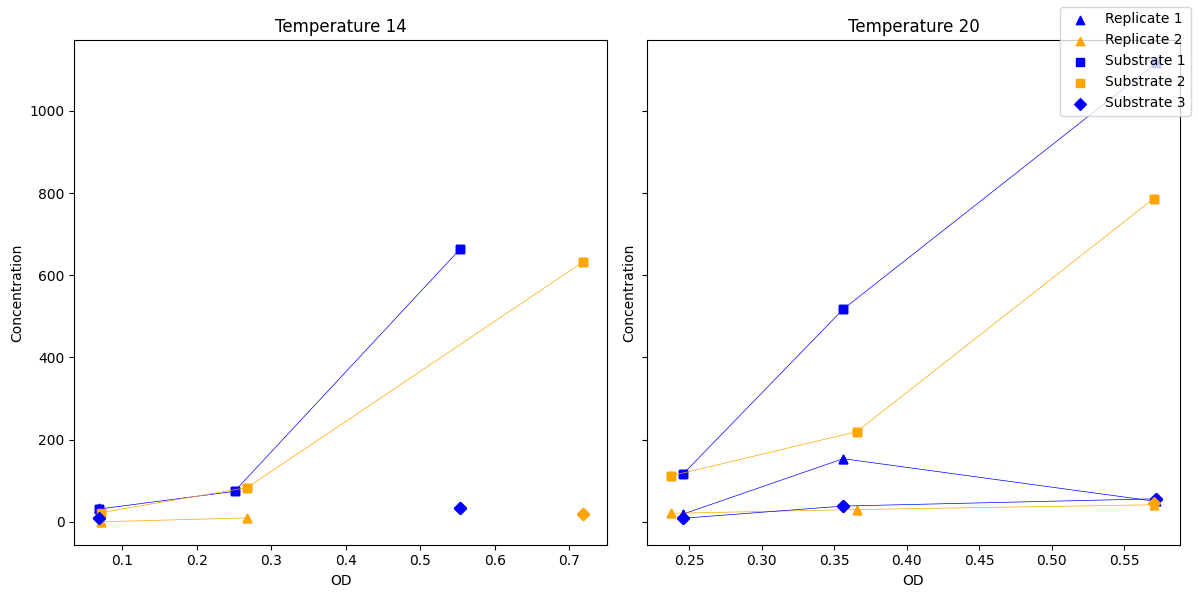

In [57]:
# Convert 'Concentration' column to numeric (handling NaN gracefully)
df_long_old['Concentration'] = pd.to_numeric(df_long_old['Concentration'], errors='coerce')


# Define unique markers and colors for substrates and replicates
markers = ['^', 's', 'D']  # Marker styles for substrates
colors = ['blue', 'orange']  # Colors for replicates

# Group by Temperature for plotting
grouped = df_long_old.groupby('Temperature')

# Create figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# list to store legend handles and labels
legend_handles = []

# Iterate over groups (each group is a subplot)
for ax, (temp, group) in zip(axs, grouped):
    # Group by Substrate for each temperature group
    subgrouped = group.groupby('Substrate')
    
    # Plot each substrate within the temperature group
    for (substrate, subgroup), marker in zip(subgrouped, markers):
        # Plot data points with unique marker style and color by replicate
        for replicate, color in zip(subgroup['Replicate'].unique(), colors):
            replicate_data = subgroup[subgroup['Replicate'] == replicate]
            scatter = ax.scatter(replicate_data['OD'], replicate_data['Concentration'], label=f'Substrate {substrate}', marker=marker, color=color)
            ax.scatter(replicate_data['OD'], replicate_data['Concentration'], label=f'Substrate {substrate}', marker=marker, color=color)
            ax.plot(replicate_data['OD'], replicate_data['Concentration'], marker=marker, color=color, linestyle='-', linewidth=0.5)
            legend_handles.append(scatter)
    # Set labels and title for the subplot
    ax.set_title(f'Temperature {temp}')
    ax.set_xlabel('OD')
    ax.set_ylabel('Concentration')
    

# Adjust layout and display the plot
fig.legend(legend_handles,['Replicate 1', 'Replicate 2', 'Substrate 1', 'Substrate 2', 'Substrate 3'],loc='upper right')
plt.tight_layout()
plt.show()

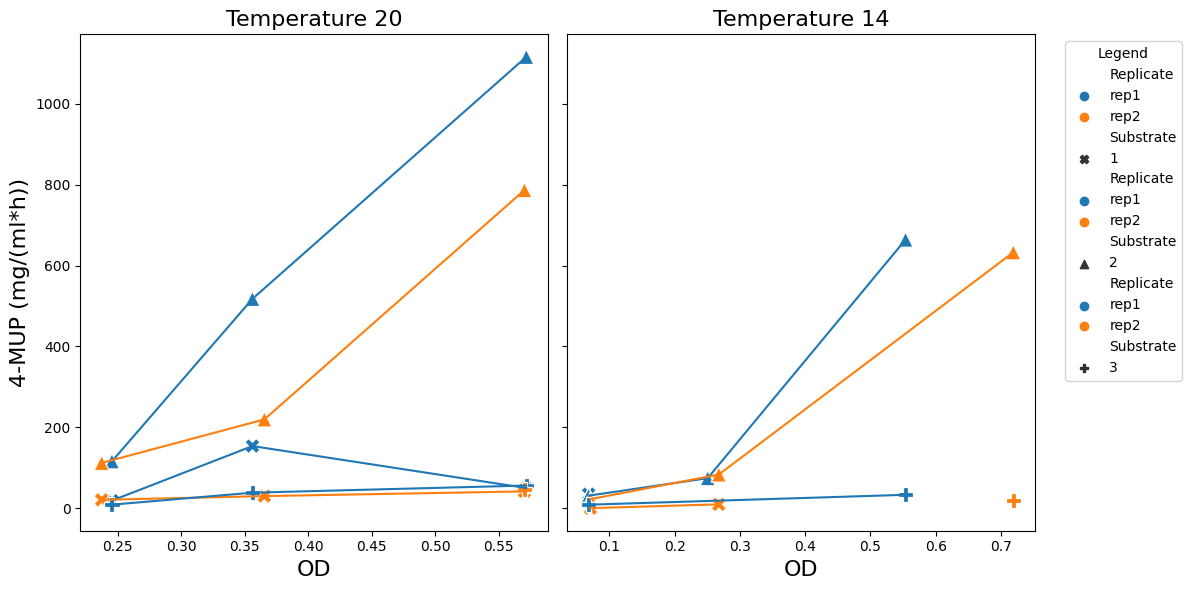

In [58]:


# Convert 'Concentration' column to numeric (handling NaN gracefully)
df_long_old['Concentration'] = pd.to_numeric(df_long_old['Concentration'], errors='coerce')
df_long_old['Substrate'] = pd.to_numeric(df_long_old['Substrate'], errors='coerce')
# Define markers for each substrate
markers_1 = { 1: 'X', 2: '^', 3: 'P'}

# Create a figure with subplots for each temperature
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Loop through each temperature subplot
for i, temp in enumerate(df_long_old['Temperature'].unique()):
    subset = df_long_old[df_long_old['Temperature'] == temp]
    
    # Plot each substrate within the temperature subplot
    for substrate in subset['Substrate'].unique():
        sub_subset = subset[subset['Substrate'] == substrate]
        # Filter out rows where 'Concentration' is NaN
        sub_subset = sub_subset.dropna(subset=['Concentration'])
        
        sns.scatterplot(data=sub_subset, x='OD', y='Concentration', hue='Replicate', style='Substrate', markers=markers_1, s=120, ax=axs[i])
        
        if i==0:
            sns.scatterplot(data=sub_subset, x='OD', y='Concentration', hue='Replicate', style='Substrate', markers=markers_1, s=120, ax=axs[i], legend=False)
        else:
            sns.scatterplot(data=sub_subset, x='OD', y='Concentration', hue='Replicate', style='Substrate', markers=markers_1, s=120, ax=axs[i],legend=False)
        sns.lineplot(data=sub_subset, x='OD', y='Concentration', hue='Replicate', ax=axs[i], legend=False)
    # Set title and labels for each subplot
    axs[i].set_title(f'Temperature {temp}',fontsize=16)
    axs[i].set_xlabel('OD',fontsize=16)

# Set common ylabel and show legend for the last subplot
axs[0].set_ylabel('4-MUP (mg/(ml*h))',fontsize=16)
axs[0].legend().set_visible(False)  # Hide the legend for the first subplot

axs[1].legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('/Users/liucheng/Desktop/My_thesis_2024/Plots/chitinase_20_14.pdf',format='pdf')

plt.show()
